# <center>Statistical Models and Computing Methods, Problem Set 3
<center>王宇哲 2201112023
<center>Academy for Advanced Interdisciplinary Studies, Peking University

## Problem 1

A total of $n$ instruments are used to observe the same astronomical source. Suppose the number of photons recorded by instrument $j$ can be modeled as $y_j \sim {\rm Poisson}(x_j\theta + r_j)$ where $\theta\geq 0$ is the parameter of interest, and $x_j$ and $r_j$ are known positive constants. You may think of $\theta, x_j , r_j$ as the source intensity, the observation time, and the background intensity for instrument $j$, respectively. Assume the photon counts across different instruments are independent.

(1) Write down the likelihood function for $\theta$.

***Proof.*** Consider that
$$
p(y_i=k|\theta)=\frac{(x_j\theta + r_j)^k e^{-(x_j\theta + r_j)}}{k!}\tag{1}
$$
hence the likelihood function for $\theta$ is
$$
\mathcal{L}(\theta)=\prod_{j=1}^{n}p(y_j|\theta)=\prod_{j=1}^{n}\frac{(x_j\theta+r_j)^{y_j}e^{-(x_j\theta+r_j)}}{y_j!}\tag{2}
$$
in which $\boldsymbol{y}=(y_1,\ldots,y_n)^{T}$.

The log-likelihood function for $\theta$ is 
$$
\mathcal{l}(\theta)=\log p(\boldsymbol{y}|\theta)=\sum_{j=1}^{n}\log p(y_j|\theta)=\sum_{j=1}^{n}\Big(y_j\log(x_j\theta+r_j)-(x_j\theta+r_j)-\log y_j!\Big)\tag{3}
$$
(2) Introduce mutually independent latent variables $z_{j1}\sim {\rm Poisson}(x_j\theta)$ and $z_{j2}\sim{\rm Poisson}(r_j)$ and suppose we observe only $y_j \equiv z_{j1} + z_{j2}$. Under this formulation, derive an EM algorithm to find the MLE of $\theta$.

***Proof.*** Consider that
$$
p(y_j,\boldsymbol{z}_j|\theta)=p(y_j|z_{j1},z_{j2},\theta)p(z_{j1}|\theta)p(z_{j2}|\theta)=\frac{(x_j\theta)^{z_{j1}}r_j^{z_{j2}}e^{-(x_j\theta+r_j)}}{z_{j1}!z_{j2}!}\tag{4}
$$
in which $\boldsymbol{z}_j=(z_{j1},z_{j2})^{T}$. We have the complete-data log-likelihood
$$
\mathcal{l}(\boldsymbol{y},\boldsymbol{z}|\theta)=\sum_{j=1}^{n}\log p(y_j,\boldsymbol{z}_j|\theta)=\sum_{j=1}^{n}\Big(z_{j1}\log(x_j\theta)+z_{j2}\log r_j-x_j\theta-r_j-\log (z_{j1}!z_{j2}!)\Big)\tag{5}
$$
in which $\boldsymbol{z}=(\boldsymbol{z}_1,\ldots,\boldsymbol{z}_n)^{T}$. The expected complete-data log-likelihood at timestep $t$ is
$$
Q^{(t)}(\theta)=\mathbb{E}_{p(\boldsymbol{z}|\boldsymbol{y},\theta^{(t)})}\mathcal{l}(\boldsymbol{y},\boldsymbol{z}|\theta)=\sum_{j=1}^{n}\mathbb{E}_{p(\boldsymbol{z}_j|y_j,\theta^{(t)})}\mathcal{l}(y_j,\boldsymbol{z}_j|\theta)\tag{6}
$$

compute the derivative w.r.t. $\theta$ 
$$
\frac{\partial}{\partial\theta}Q^{(t)}(\theta)=\sum_{j=1}^{n}\mathbb{E}_{p(\boldsymbol{z}_j|y_j,\theta^{(t)})}\Big(\frac{z_{j1}}{\theta}-x_j\Big)=\frac{1}{\theta}\sum_{j=1}^{n}\mathbb{E}_{p(z_{j1}|y_j,\theta^{(t)})}z_{j1}-\sum_{j=1}^{n}x_j\tag{7}
$$
and set the derivative to $0$ to obtain
$$
\theta^{(t+1)}=\mathop{\arg\max}_{\theta}\,Q^{(t)}(\theta)=\frac{\sum_{j=1}^{n}\mathbb{E}_{p(z_{j1}|y_j,\theta^{(t)})}z_{j1}}{\sum_{j=1}^{n}x_j}\tag{8}
$$
Consider that $y_j=z_{j1}+z_{j2}$, $z_{j1}\sim{\rm Poisson}(x_j\theta^{(t)})$, $z_{j2}\sim{\rm Poisson}(r_j)$, we can prove that
$$
z_{j1}|y_j=z_{j1}|(z_{j1}+z_{j2})\sim{\rm Binomial}(y_j,\frac{x_j\theta^{(t)}}{x_j\theta^{(t)}+r_j})\tag{9}
$$
*Proof Sketch.* Consider independent random variables $X_1\sim{\rm Poisson}(\lambda_1)$, $X_2\sim{\rm Poisson}(\lambda_2)$, then $X_1+X_2\sim{\rm Poisson}(\lambda_1+\lambda_2)$. Consider that
$$
\begin{aligned}
p(X_1=x|X_1+X_2=y)&=\frac{p(X_1=x,X_1+X_2=y)}{p(X_1+X_2=y)}\\
&=\frac{p(X_1=x)p(X_2=y-x)}{p(X_1+X_2=y)}\\
&={\frac{\lambda_1^{x}e^{-\lambda_1}}{x!}\frac{\lambda_2^{y-x}e^{-\lambda_2}}{(y-x)!}}{\frac{y!}{(\lambda_1+\lambda_2)^{y}e^{-\lambda_1-\lambda_2}}}\\
&=\frac{y!}{x!(y-x)!}\Big(\frac{\lambda_1}{\lambda_1+\lambda_2}\Big)^x\Big(1-\frac{\lambda_1}{\lambda_1+\lambda_2}\Big)^{y-x}
\end{aligned}\tag{10}
$$
we have $X_1|X_1+X_2\sim{\rm Binomial}(X_1+X_2,\frac{\lambda_1}{\lambda_1+\lambda_2})$. 	$\square$

We compute the expectation of Binomial distribution
$$
\mathbb{E}_{p(z_{j1}|y_j,\theta^{(t)})}z_{j1}=\frac{x_jy_j\theta^{(t)}}{x_j\theta^{(t)}+r_j}\tag{11}
$$
hence
$$
\theta^{(t+1)}=\frac{\theta^{(t)}}{\sum_{j=1}^{n}x_j}\sum_{j=1}^{n}\frac{x_jy_j}{x_j\theta^{(t)}+r_j}\tag{12}
$$
The EM algorithm to find the MLE of $\theta$ is presented below.

1. randomly initialize $\theta_0\geq0$
2. update parameter $\theta$ via $(12)$
3. repeat 2 until convergence


(3) Apply your EM algorithm to the data set given by Table 1. What is the MLE?

<img src="Table1.jpg" style="zoom: 30%;" />

***Proof.*** Python implementation of the EM algorithm is as follows. We set the convergence threshold $\varepsilon=1e-5$ and $\theta_0=1$.

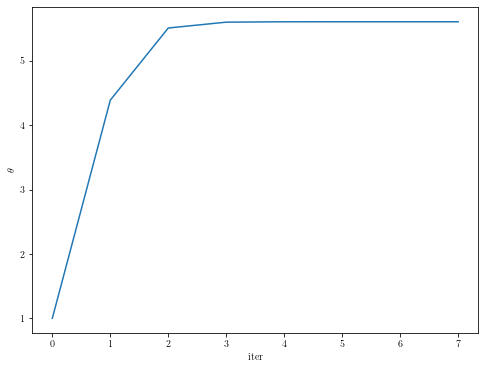

the MLE of theta is 5.60606329203378


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([1.41, 1.84, 1.64, 0.85, 1.32, 1.97, 1.70, 1.02, 1.84, 0.92], dtype=float)
r = np.array([0.94, 0.70, 0.16, 0.38, 0.40, 0.57, 0.24, 0.27, 0.60, 0.81], dtype=float)
y = np.array([13, 17, 6, 3, 7, 13, 8, 7, 5, 8], dtype=int)

theta_0 = 1
epsilon = 1e-5
err = 1 + epsilon
theta_list = [theta_0]

while err >= epsilon:
    theta = (theta_0 / np.sum(x)) * (np.dot(x / (x * theta_0 + r), y))
    err = np.abs(theta - theta_0)
    theta_list.append(theta)
    theta_0 = theta

# plot
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.plot(np.arange(0, len(theta_list)), np.array(theta_list))

fig.set_size_inches(8,6)
plt.xlabel('$\\rm iter$')
plt.ylabel('$\\theta$')
plt.savefig('3-1-1.jpg',dpi=1000, bbox_inches='tight')
plt.show()

print(f'the MLE of theta is {theta}')

The MLE of $\theta$ is
$$
\hat{\theta}=5.606\tag{13}
$$
(4) For these data compute the observed Fisher information and the fraction of missing information. (Recall the observed Fisher information is defined as the negative second derivative of the observed data log-likelihood evaluated at the MLE.)

***Proof.*** The observed Fisher information is defined as 
$$
\begin{aligned}
I_{\rm observed}(\hat\theta)&=-\nabla^2_{\theta}\mathcal{L}(\hat{\theta})\\&=-\nabla^2_{\theta}\Big(\sum_{j=1}^{n}\big(y_j\log(x_j\hat{\theta}+r_j)-(x_j\hat{\theta}+r_j)-\log y_j!\big)\Big)\\
&=\sum_{j=1}^{n}\frac{x_j^2y_j}{(x_j\hat{\theta}+r_j)^2}\\
&=2.423
\end{aligned}\tag{14}
$$
using $(3)$. And the complete information is given by
$$
\begin{aligned}
I_{\rm complete}(\hat\theta)&=-\frac{\partial^2}{\partial\theta^2}Q(\hat\theta)\\
&=-\sum_{j=1}^{n}\mathbb{E}_{p(z_{j1}|y_j,\hat\theta)}\frac{\partial}{\partial\theta}\Big(\frac{z_{j1}}{\theta}-x_j\Big)\Big|_{\theta=\hat\theta}\\
&=\frac{1}{\hat\theta^2}\sum_{j=1}^{n}\mathbb{E}_{p(z_{j1}|y_j,\hat\theta)}z_{j1}\\
&=\frac{1}{\hat\theta^2}\sum_{j=1}^{n}\frac{x_jy_j\hat\theta}{x_j\hat\theta+r_j}\\
&=\sum_{j=1}^{n}\frac{x_jy_j}{\hat\theta(x_j\hat\theta+r_j)}\\
&=2.588
\end{aligned}\tag{15}
$$
using $(7)$ and $(11)$, respectively. Hence the fraction of missing information is given by 
$$
\chi_{\rm missing}=1-\frac{I_{\rm observed}}{I_{\rm complete}}=0.064\tag{16}
$$
All the numerical results above are computed via the python code below.

In [3]:
I_obs = np.dot(np.square(x / (theta * x + r)), y)
print(f'the observed Fisher information is {I_obs}')

I_com = np.dot(x / theta, y / (x * theta + r))
print(f'the complete information is {I_com}')

frac = 1 - I_obs / I_com
print(f'the fraction of missing information is {frac}')

the observed Fisher information is 2.423093521117247
the complete information is 2.5882690753596678
the fraction of missing information is 0.06381699484605097


## Problem 2

Let $x_1,\ldots x_m$ be i.i.d. sample from a normal distribution with mean $\mu$ and variance $\sigma^2$. Suppose for each $x_i$ we observe $y_i = |x_i|$ rather than $x_i$. Download the data from the course website.

(1) Derive an EM algorithm to find the MLE of $\mu$ and $\sigma^2$.

***Proof.*** Given model parameter $\theta=(\mu, \sigma^2)$, latent variable $x_i\sim\mathcal{N}(\mu, \sigma^2)$ and observed data $y_i=|x_i|$, we consider the complete data log-likelihood
$$
\begin{aligned}
\mathcal{l}(\boldsymbol{x},\boldsymbol{y}|\theta)&=\sum_{i=1}^{m}\log{p(x_i, y_i|\theta)}\\
&=\sum_{i=1}^{m}\Big(\mathbb{1}_{x_i\geq 0}\log p(x_i=y_i|\theta)+\mathbb{1}_{x_i< 0}\log p(x_i=-y_i|\theta)\Big)\\
&=\sum_{i=1}^{m}\Big(\mathbb{1}_{x_i\geq 0}\log{\mathcal{N}(y_i|\theta)+\mathbb{1}_{x_i< 0}\log{\mathcal{N}(-y_i|\theta)}}\Big)
\end{aligned}\tag{17}
$$
in which $\mathbb{1}_{x_i\geq 0}$ is the indicator function, $\boldsymbol{x}=(x_1,\ldots,x_m)^{T}$, $\boldsymbol{y}=(y_1,\ldots,y_m)^{T}$. Consider the conditional probability
$$
p(x_i|y_i,\theta)=\frac{p(x_i,y_i|\theta)}{\sum_{x_i} p(x_i,y_i|\theta)}\tag{18}
$$
we denote 
$$
\gamma_{i,1}=p(x_i\geq 0|y_i,\theta)=\frac{\mathcal{N}(y_i|\theta)}{\mathcal{N}(y_i|\theta)+\mathcal{N}(-y_i|\theta)}=\frac{\exp{\big(-\frac{(y_i-\mu)^2}{2\sigma^2}\big)}}{\exp{\big(-\frac{(y_i-\mu)^2}{2\sigma^2}\big)}+\exp{\big(-\frac{(y_i+\mu)^2}{2\sigma^2}\big)}}\tag{19}
$$
and
$$
\gamma_{i,-1}=p(x_i<0|y_i,\theta)=\frac{\mathcal{N}(-y_i|\theta)}{\mathcal{N}(y_i|\theta)+\mathcal{N}(-y_i|\theta)}\frac{\exp{\big(-\frac{(y_i+\mu)^2}{2\sigma^2}\big)}}{\exp{\big(-\frac{(y_i-\mu)^2}{2\sigma^2}\big)}+\exp{\big(-\frac{(y_i+\mu)^2}{2\sigma^2}\big)}}\tag{20}
$$
Notice that $\gamma_{i,1}+\gamma_{i,-1}=1,\forall i$. The expected complete-data log-likelihood at timestep $t$ is
$$
\begin{aligned}
Q^{(t)}(\theta)&=\mathbb{E}_{p(\boldsymbol{x}|\boldsymbol{y},\theta^{(t)})}\mathcal{l}(\boldsymbol{x},\boldsymbol{y}|\theta)\\
&=\sum_{i=1}^{m}\mathbb{E}_{p(x_i|y_i,\theta^{(t)})}\mathcal{l}(x_i,y_i|\theta)\\
&=\sum_{i=1}^{m}\sum_{x_i}p(x_i|y_i,\theta^{(t)})\Big(\mathbb{1}_{x_i\geq 0}\log{\mathcal{N}(y_i|\theta)+\mathbb{1}_{x_i< 0}\log{\mathcal{N}(-y_i|\theta)}}\Big)\\
&=\sum_{i=1}^{m}\Big(\gamma^{(t)}_{i,1}\log{\mathcal{N}(y_i|\theta)+\gamma^{(t)}_{i,-1}\log{\mathcal{N}(-y_i|\theta)}}\Big)\\
&=-\sum_{i=1}^{m}\Big(\gamma^{(t)}_{i,1}\big(\frac{(y_i-\mu)^2}{2\sigma^2}+\frac{1}{2}\log{2\pi\sigma^2}\big)+\gamma^{(t)}_{i,-1}\big(\frac{(y_i+\mu)^2}{2\sigma^2}+\frac{1}{2}\log{2\pi\sigma^2}\big)\Big)\\
&=-\sum_{i=1}^{m}\Big(\frac{y_i^2+\mu^2-2(2\gamma^{(t)}_{i,1}-1)y_i\mu}{2\sigma^2}+\frac{1}{2}\log{2\pi\sigma^2}\Big)
\end{aligned}\tag{21}
$$
Compute the derivative w.r.t. $\mu$
$$
\frac{\partial}{\partial\mu}Q^{(t)}(\theta)=-\sum_{i=1}^{m}\frac{\mu-(2\gamma^{(t)}_{i,1}-1)y_i}{\sigma^2}\tag{22}
$$
and set the derivative to $0$ to obtain parameter update of $\mu$
$$
\mu^{(t+1)}=\frac{1}{m}\sum_{i=1}^{m}(2\gamma^{(t)}_{i,1}-1)y_i\tag{23}
$$
Similarly, compute the derivative w.r.t. $\sigma^2$
$$
\frac{\partial}{\partial(\sigma^2)}Q^{(t)}(\theta)=\sum_{i=1}^{m}\Big(\frac{y_i^2+\mu^2-2(2\gamma^{(t)}_{i,1}-1)y_i\mu}{2(\sigma^2)^2}-\frac{1}{2\sigma^2}\Big)\tag{24}
$$
and set the derivative to $0$ to obtain parameter update of $\sigma^2$
$$
(\sigma^2)^{(t+1)}=\frac{1}{m}\sum_{i=1}^{m}\Big(y_i^2+(\mu^{(t+1)})^2-2(2\gamma^{(t)}_{i,1}-1)y_i\mu^{(t+1)}\Big)\tag{25}
$$
The EM algorithm to find the MLE of $\mu$ and $\sigma^2$ is presented below.

1. randomly initialize $\mu$, $\sigma^2$
2. compute $\gamma^{(t)}_{i,1},\forall i$ via $(19)$
3. update parameter $\mu$ via $(23)$
4. update parameter $\sigma^2$ via $(25)$
5. repeat 2,3,4 until convergence

(2) Apply your EM algorithm to the data with different starting values. Does your EM always converge to the same point estimate? If not, do you observe any pattern of your estimates? Explain it.

***Proof.*** Python implementation of the EM algorithm is as follows. We set the convergence threshold $\varepsilon=1e-5$ for both $\mu$ and $\sigma^2$. Model parameters $\mu$ and $\sigma^2$ are initialized at grid points of $(-4,4)\times(0.1,10)$. Change of $(\mu,\sigma^2)$ in the process of optimization is presented in blue. Estimated MLE of $\mu$ and $\sigma^2$ to which the EM algorithm converge is highlighted in orange. 

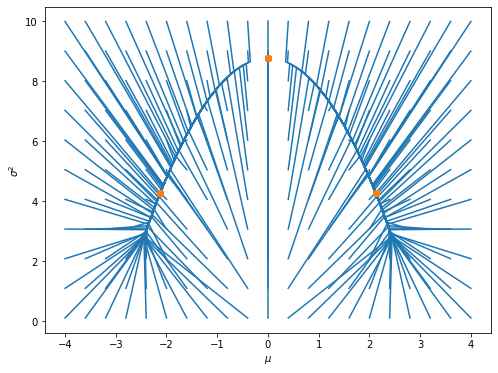

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

observed_data = np.load('absolute_gaussian_data.npy')


def EM_algorithm(y=observed_data, mu_0=0, sigma2_0=1, epsilon=1e-5):
    """
    implement EM algorithm
    """
    mu_list, sigma2_list = [mu_0], [sigma2_0]
    m = len(y)
    err = 1 + epsilon

    while err >= epsilon:
        gamma = 1 / (1 + (np.exp(-np.square(y+mu_0)/(2*sigma2_0))) / (np.exp(-np.square(y-mu_0)/(2*sigma2_0))))
        mu = np.dot(2*gamma-1, y) / m
        sigma2 = (np.dot(y, y) + m*(mu**2) - 2*mu*np.dot(2*gamma-1, y)) / m

        err = max(np.abs(mu - mu_0), np.abs(sigma2-sigma2_0))
        mu_list.append(mu)
        sigma2_list.append(sigma2)

        mu_0 = mu
        sigma2_0 = sigma2

    return mu_list, sigma2_list

# plot
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})

for mu_0 in np.linspace(4, -4, 21):
    for sigma2_0 in np.linspace(0.1, 10, 11):
        mu_list, sigma2_list = EM_algorithm(y=observed_data, mu_0=mu_0, sigma2_0=sigma2_0, epsilon=1e-5)
        ax.plot(np.array(mu_list), np.array(sigma2_list), color='tab:blue')
        ax.scatter(mu_list[-1], sigma2_list[-1], color='tab:orange', zorder=2)

fig.set_size_inches(8,6)
plt.xlabel('$\\mu$')
plt.ylabel('$\\sigma^2$')
plt.savefig('3-2-1.jpg',dpi=1000, bbox_inches='tight')
plt.show()

We can see that the EM algorithm **DOES NOT** always converge to the same point estimate. The pattern of observed estimates is presented below.

1. $\forall \mu_0>0, \forall \sigma^2>0$, the EM algorithm converges to $(\mu,\sigma^2)=(2.1230,4.2699)$
2. $\forall \mu_0<0, \forall \sigma^2>0$, the EM algorithm converges to $(\mu,\sigma^2)=(-2.1230,4.2699)$
3. $\mu_0=0, \forall \sigma^2>0$, the EM algorithm converges to $(\mu,\sigma^2)=(0,8.7772)$

It can be deduced that the true MLEs of $\mu$ and $\sigma^2$ are $(\mu,\sigma^2)=(2.1230,4.2699)$ and $(\mu,\sigma^2)=(-2.1230,4.2699)$ to which the EM algorithm correctly converge when $\mu_0\neq 0$ (case 1, 2). These two MLEs are in a way equivalent due to the symmetric nature of this problem (*i.e.* by sampling i.i.d. $x_i$ from $\mathcal{N}(\mu,\sigma^2)$ and $\mathcal{N}(-\mu,\sigma^2)$ we can generate observed data $\boldsymbol{y}$ of the same distribution). When $\mu_0=0$, the EM algorithm converges to the local optimal $(\mu,\sigma^2)=(0,0.8772)$, which is not the true MLE of $\mu$ and $\sigma^2$.

(3) Derive the gradient of the parameters. Compare the standard gradient descent method to EM. Show $\mathcal{l}^*-\mathcal{l}$ as a function of the number of iterations ($\mathcal{l}$ is the log-likelihood function and $\mathcal{l}^*$ is the optimal value of it) for both methods. Which one is better in this case? Why?

***Proof.*** The marginal log-likelihood function is given by
$$
\mathcal{l}(\theta)=\log{p(\boldsymbol{y}|\theta)}=\mathbb{E}_{p(\boldsymbol{x}|\boldsymbol{y},\theta^{(t)})}\log{p(\boldsymbol{x},\boldsymbol{y}|\theta})-\mathbb{E}_{p(\boldsymbol{x}|\boldsymbol{y},\theta^{(t)})}\log{p(\boldsymbol{x}|\boldsymbol{y},\theta)}=Q(\theta|\theta^{(t)})-H(\theta|\theta^{(t)})\tag{26}
$$
$Q(\theta|\theta^{(t)})$ is computed in $(21)$. $H(\theta|\theta^{(t)})$ is computed as
$$
\begin{aligned}
H(\theta|\theta^{(t)})&=\mathbb{E}_{p(\boldsymbol{x}|\boldsymbol{y},\theta^{(t)})}\log{p(\boldsymbol{x}|\boldsymbol{y},\theta)}\\
&=\sum_{i=1}^{m}\mathbb{E}_{p(x_i|y_i,\theta^{(t)})}\mathcal{l}(x_i|y_i,\theta)\\
&=\sum_{i=1}^{m}(\gamma^{(t)}_{i,1}\log{\gamma_{i,1}}+\gamma^{(t)}_{i,-1}\log{\gamma_{i,-1}})\\
&=\sum_{i=1}^{m}\big(\gamma^{(t)}_{i,1}\log{\gamma_{i,1}}+(1-\gamma^{(t)}_{i,1})\log{(1-\gamma_{i,1})}\big)
\end{aligned}\tag{27}
$$
using $(18)$, $(19)$ and $(20)$. Note that 
$$
\nabla_{\theta}\mathcal{l}(\theta^{(t)})=\frac{\partial}{\partial\theta}Q(\theta^{(t)}|\theta^{(t)})\tag{28}
$$
using $(22)$ and $(24)$,  we have the gradient of $\mu$ at timestep $t$
$$
\frac{\partial}{\partial\mu}\mathcal{l}(\theta^{(t)})=\frac{\partial}{\partial\mu}Q^{(t)}(\theta^{(t)})=-\sum_{i=1}^{m}\frac{\mu^{(t)}-(2\gamma^{(t)}_{i,1}-1)y_i}{(\sigma^2)^{(t)}}\tag{29}
$$
and the gradient of $\sigma^2$ at timestep $t$
$$
\frac{\partial}{\partial(\sigma^2)}\mathcal{l}(\theta^{(t)})=\frac{\partial}{\partial(\sigma^2)}Q^{(t)}(\theta^{(t)})=\sum_{i=1}^{m}\Big(\frac{y_i^2+(\mu^{(t)})^2-2(2\gamma^{(t)}_{i,1}-1)y_i\mu^{(t)}}{2((\sigma^2)^{(t)})^2}-\frac{1}{2(\sigma^2)^{(t)}}\Big)\tag{30}
$$
The standard gradient descent method performs
$$
\theta^{(t+1)}=\theta^{(t)}+\eta\nabla_{\theta}\mathcal{l}(\theta^{(t)})\tag{31}
$$
at each timestep $t$, where $\eta$ is the learning rate. Python implementation of the standard gradient descent method and EM are as follows. We run both algorithms for $20$ iterations. Model parameters $\mu$ and $\sigma^2$ are initialized at $(1,1)$ with some arbitrary. Learning rate for the standard gradient descent method is fine-tuned to be $\eta=0.008$. $\mathcal{l}^{*}-\mathcal{l}$ is calculated using $(21)$, $(26)$ and $(27)$, and $\mathcal{l}^{*}$ is chosen to be $\mathcal{l}$ calculated after the $20\text{-}th$ iteration of EM. 

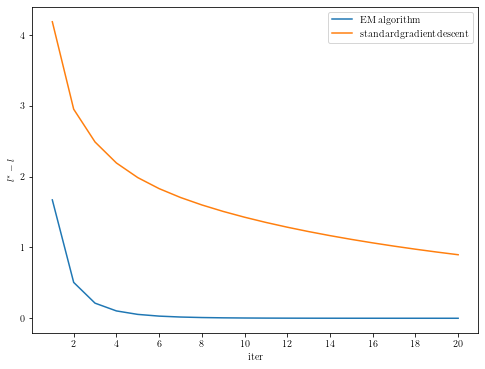

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

observed_data = np.load('absolute_gaussian_data.npy')


def cal_l(y, mu, sigma2, gamma):
    """
    calculate the marginal log-likelihood function l(mu, sigma^2)
    """
    m = len(y)

    Q = -(((np.dot(y, y) + m*(mu**2) -2*mu*np.dot(2*gamma-1, y)) / (2*sigma2)) + 0.5*m*np.log(2*np.pi*sigma2))
    H = np.dot(gamma, np.log(gamma)) + np.dot(1-gamma, np.log(1-gamma))
    l = Q - H

    return l


def EM_algorithm(y=observed_data, mu_0=1, sigma2_0=1, iter=20):
    """
    implement EM algorithm
    """
    l_list = []
    m = len(y)

    for i in range(iter):
        gamma = 1 / (1 + (np.exp(-np.square(y+mu_0)/(2*sigma2_0))) / (np.exp(-np.square(y-mu_0)/(2*sigma2_0))))
        mu = np.dot(2*gamma-1, y) / m
        sigma2 = (np.dot(y, y) + m*(mu**2) - 2*mu*np.dot(2*gamma-1, y)) / m

        l = cal_l(y=y, mu=mu, sigma2=sigma2, gamma=gamma)
        l_list.append(l)
        
        mu_0 = mu
        sigma2_0 = sigma2

    return l_list


def gradient_descent(y=observed_data, mu_0=1, sigma2_0=1, iter=20, eta=0.1):
    """
    implement standard gradient descent algorithm
    """
    l_list = []
    m = len(y)

    for i in range(iter):
        gamma = 1 / (1 + (np.exp(-np.square(y+mu_0)/(2*sigma2_0))) / (np.exp(-np.square(y-mu_0)/(2*sigma2_0))))
        mu_gradient = -(m*mu_0 - np.dot(2*gamma-1, y)) / (sigma2_0)
        sigma2_gradient = ((np.dot(y, y) + m*(mu_0**2) -2*mu_0*np.dot(2*gamma-1, y)) / (2*sigma2_0**2)) - (m / (2*sigma2_0))

        mu = mu_0 + eta * mu_gradient
        sigma2 = sigma2_0 + eta * sigma2_gradient

        l = cal_l(y=y, mu=mu, sigma2=sigma2, gamma=gamma)
        l_list.append(l)

        mu_0 = mu
        sigma2_0 = sigma2

    return l_list


l_list_EM = EM_algorithm(y=observed_data, mu_0=1, sigma2_0=1, iter=20)
l_list_GD = gradient_descent(y=observed_data, mu_0=1, sigma2_0=1, iter=20, eta=0.008)
l_star = l_list_EM[-1]

# plot
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})

ax.plot(np.arange(1,21), l_star-np.array(l_list_EM), label='$\\rm EM\\, algorithm$')
ax.plot(np.arange(1,21), l_star-np.array(l_list_GD), label='$\\rm standard\\, gradient\\, descent$')


fig.set_size_inches(8,6)
ax.xaxis.set_major_locator(MultipleLocator(2))
plt.xlabel('$\\rm iter$')
plt.ylabel('$l^{*}-l$')
plt.legend()
plt.savefig('3-2-2.jpg',dpi=1000, bbox_inches='tight')
plt.show()

We can see that EM converges significantly faster than the standard gradient descent method and thus is better in this case. The reason is that EM algorithm directly finds the optimal point of $Q^{(t)}(\theta)$ at timestep $t$ with no need for hyper parameters and thus is significantly faster than vanilla gradient descent. 

## Problem 3

In this problem, we will apply LDA to human ancestry discovery. In applications of population genetics, it is often useful to classify individuals in a sample into populations. An underlying assumption is that there are $K$ ancestor populations, and each individual is an admixture of the ancestor populations. For each individual, we measure some genetic data about them, called genotype data. Each genotype is a locus that can take a discrete count value, individuals with similar genotypes are expected to belong to the same ancestor populations. We can derive the admixture coefficients $\theta$ for each individual by running an LDA model, where the documents are individuals, and the words are the genotype.

Now let us assume the $\beta$ matrix is known, and focus on variational inference of the population mixture $\theta$ and the genotype ancestry (topic) assignments $z$ for any individual. The variational distribution used to approximate the posterior (for each individual) is
$$
q_i(\theta,z|\gamma,\phi)=q(\theta_i|\gamma_i)\prod_{n=1}^{N_i}q(z_{in}|\phi_{in}),\ \ i=1,\ldots,M\tag{32}
$$
The data matrix provides data about $M = 100$ individuals, each represented by a vocabulary of $N = 200$ genotype loci. This data has been preprocessed into a count matrix $D$ of size $M \times N$. $D_{ij}$ is the number of occurrences of genotype $j$ in individual $i$, and $\sum_j D_{ij}$ is the number of genotype loci in an individual. We learnt the LDA topic model over $K = 4$ ancestor populations, and the data matrix and the known matrix can be downloaded from the course website. The value of $\alpha$ is $0.1$. You may use the following code to load the data in python.

(1) Derive the variational inference update equations for estimating $\gamma$ and $\phi$.

***Proof.*** The LDA model for human ancestry discovery is illustrated below. In this problem, we set the number of individuals (*i.e.* documents) $M=100$, the size of genotype loci vocabulary $N=200$, the number of ancestor populations (*i.e.* topics) $K=4$ and $\alpha=0.1$ (symmetric parameter *i.e.* $\alpha=(0.1,0.1,0.1,0.1)^{T}$). The $\beta$ matrix *i.e.* $(\beta_1,\ldots,\beta_K)$ of size $N\times K$ is known and is denoted as $B$ in case of possible confusion. For each individual, the number of genotype loci (*i.e.* the number of words in a particular document) is given by $N_i=\sum_{j}D_{ij}$.

<img src="LDA.jpg" style="zoom: 25%;" />

For the complete probability model, we have $p(\theta_i|\alpha)\sim{\rm Dirichlet}(\alpha)$, $p(z_{i,n}|\theta_i)\sim{\rm Discrete}(\theta_i)$ and $p(w_{i,n}|z_{i,n},\beta)\sim{\rm Discrete}(\beta_{z_{i,n}})$. The joint probability is given by
$$
p(w,z,\theta)=\prod_{i=1}^{M}p(\theta_i|\alpha)\prod_{n=1}^{N_i}p(z_{i,n}|\theta_i)p(w_{i,n}|z_{i,n},\beta)\tag{33}
$$
We set $q(\theta_i|\gamma_i)\sim{\rm Dirichlet}(\gamma_i)$ and $q(z_{i,n}|\phi_{i,n})\sim{\rm Discrete}(\phi_{i,n})$, accordingly. The variational distribution is given by
$$
q(\theta,z|\gamma,\phi)=\prod_{i=1}^{M}q_i(\theta,z|\gamma,\phi)=\prod_{i=1}^{M}q(\theta_i|\gamma_i)\prod_{n=1}^{N_i}q(z_{i,n}|\phi_{i,n})\tag{34}
$$
To update $\gamma$, mean-field variational inference for LDA requires
$$
\begin{aligned}
q(\theta_i|\gamma^{*}_{i})&\propto\exp{(\mathbb{E}_{q(\theta_{-i},z)}\log{p(w,z,\theta)})}\\
&\propto\exp{\Big(\sum_{k=1}^{K}\big(\alpha-1+\sum_{n=1}^{N_i}\phi_{i,n,k}\big)\log{\theta_{i,k}}\Big)} 
\end{aligned}\tag{35}
$$
hence
$$
\gamma^{*}_{i,k}=\alpha+\sum_{n=1}^{N_i}\phi_{i,n,k}\tag{36}
$$
To update $\phi$, mean-field variational inference for LDA requires
$$
\begin{aligned}
q(z_{i,n}|\phi^{*}_{i,n})&\propto\exp{(\mathbb{E}_{q(\theta,z_{-(d,n)})}\log{p(w,z,\theta)})}\\
&\propto\exp{\big(\mathbb{E}_{q(\theta,z_{-(d,n)})}(\log{p(z_{i,n}|\theta_i)}+\log{p(w_{i,n}|z_{i,n},\beta)})\big)}\\
&\propto\exp{\Big(\sum_{k=1}^{K}\mathbb{1}_{z_{i,n}=k}\big(\mathbb{E}_{\theta_i}\log{\theta_{i,k}}+\sum_{j=1}^{N}w_{i,n}^{(j)}\mathbb{E}_{\beta_{k}}\log{\beta_{k,j}}}\big)\Big)\\
&=\exp{\Big(\sum_{k=1}^{K}\mathbb{1}_{z_{i,n}=k}\big(\mathbb{E}_{\theta_i}\log{\theta_{i,k}}+\sum_{j=1}^{N}w_{i,n}^{(j)}\log{\beta_{k,j}}\big)\Big)}
\end{aligned}\tag{37}
$$

in which $w_{i,n}^{(j)}$ serves as an indicator *i.e.* $w_{i,n}^{(j)}=1$ only when $w_{i,n}$ is the $j\text{-}th$ locus (*i.e.* word) in the vocabulary else $w_{i,n}^{(j)}=0$. Hence
$$
\phi_{i,n,k}^{*}\propto\exp\Big(\mathbb{E}_{\theta_i}\log{\theta_{i,k}}+\sum_{j=1}^{N}w_{i,n}^{(j)}\log{\beta_{k,j}}\Big)=\beta_{k,w_{i,n}}\exp{\big(\mathbb{E}_{\theta_i}\log{\theta_{i,k}}\big)}\tag{38}
$$

in which we use $\beta_{k,w_{i,n}}$ to formally represent corresponding value of locus $w_{i,n}$ in $\beta_{k}$. To compute the expectation term, we write the Dirichlet distribution $q(\theta_i|\gamma_i)\sim{\rm Dirichlet}(\gamma_i)$ in the form of exponential family
$$
q(\theta_i|\gamma_i)=\exp{\Big(\sum_{k=1}^{K}(\gamma_{i,k}-1)\log{\theta_{i,k}}+\log{\Gamma\big(\sum_{k=1}^{K}\gamma_{i,k}\big)-\sum_{k=1}^{K}\log{\Gamma(\gamma_{i,k})}}\Big)}\tag{39}
$$
in which the sufficient statistics is $T(\theta_{i,k})=\log{\theta_{i,k}}$. For exponential family
$$
p(x|\eta)=h(x)\exp{(\eta^{T}T(x)-A(\eta))}\tag{40}
$$
we have the fact that $\mathbb{E}_{x}(T(x))=\nabla_{\eta}A(\eta)$. Hence
$$
\mathbb{E}_{\theta_i}\log{\theta_{i,k}}=\psi(\gamma_{i,k})-\psi\big(\sum_{k=1}^{K}\gamma_{i,k}\big)\tag{41}
$$
in which the digamma function $\psi(x)=\frac{d}{dx}\ln{\Gamma(x)}$. Consider that (using $(36)$)
$$
\begin{aligned}
\sum_{k=1}^{K}\gamma_{i,k}&=\sum_{k=1}^{K}\Big(\alpha+\sum_{n=1}^{N_i}\phi_{i,n,k}\Big)\\
&=K\alpha+\sum_{k=1}^{K}\sum_{n=1}^{N_i}\phi_{i,n,k}\\
&=K\alpha+\sum_{n=1}^{N_i}\sum_{k=1}^{K}\phi_{i,n,k}\\
&=K\alpha+N_i
\end{aligned}\tag{42}
$$
is a constant for given $i$. We combine $(38)$, $(41)$, $(42)$ to give
$$
\begin{aligned}
\phi_{i,n,k}^{*}&\propto\beta_{k,w_{i,n}}\exp{\big(\mathbb{E}_{\theta_i}\log{\theta_{i,k}}\big)}\\
&=\beta_{k,w_{i,n}}\exp{\Big(\psi(\gamma_{i,k})-\psi\big(\sum_{k=1}^{K}\gamma_{i,k}\big)\Big)}\\
&\propto\beta_{k,w_{i,n}}\exp{\psi(\gamma_{i,k})}
\end{aligned}\tag{43}
$$
In this problem, only the count matrix $D$ and the beta matrix $B$ are known rather than the original genotype data. Therefore, we compute $\phi_{i,j,k}$ where $D_{ij}\neq 0$ as
$$
\phi_{i,j,k}^{*}\propto B_{jk}\exp{\psi(\gamma_{i,k})}\tag{44}
$$
which satisfies 
$$
\sum_{j=1}^{N}D_{ij}\sum_{k=1}^{K}\phi^{*}_{i,j,k}=\sum_{j=1}^{N}D_{ij}=N_i\tag{45}
$$
we rewrite $(36)$ to give
$$
\gamma^{*}_{i,k}=\alpha+\sum_{n=1}^{N_i}\phi_{i,n,k}=\alpha+\sum_{j=1}^{N}D_{ij}\phi_{i,j,k}\tag{46}
$$
The variational inference update equations for estimating $\gamma$ and $\phi$ are given by $(44)$ and $(46)$. The variational inference algorithm is presented below.

**for** $i=1$ **to** $M$ **do**
	initialize $\phi^{(0)}_{i,j,k}=\frac{1}{K},\, \forall j, k \ \ {\rm s.t.}\ \ D_{ij}\neq 0$
	initialize $\gamma^{(0)}_{i,k}=\alpha+\frac{N_i}{K},\, \forall k$
	**repeat**
		**for** $j=1$ **to** $N$ **do**
			**for** $k=1$ **to** $K$ **do**
				$\phi^{(t+1)}_{i,j,k}=B_{jk}\exp{\psi(\gamma^{(t)}_{i,k})}$
			normalize $\phi^{(t+1)}_{i,j,k}$ $\rm s.t.$ $\sum_{k=1}^{K}\phi^{(t+1)}_{i,j,k}=1$
		$\gamma^{(t+1)}_{i}=\alpha+\sum_{j=1}^{N}D_{ij}\phi^{(t+1)}_{i,j}$
​	**until** convergence

(2) For individual one, run LDA inference to find $\phi$ for each genotype locus, store it as a matrix of size $n_1 \times K$ (where $n_1$ : $\sum_{1j} I(D_{1j} \neq 0)$, $I(\cdot)$ being the indicator function, is the number of non-zero genotypes present in individual 1), and plot it as an image in your write up. Don't forget to show the colormap using the colorbar function to allow the colors in the image to be mapped to numbers!

***Proof.*** Python implementation of the variational inference algorithm is as follows. We set the convergence threshold $\varepsilon=1e-3$ for each parameter.

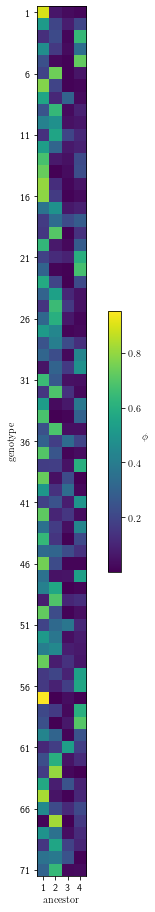

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.special import digamma
%matplotlib inline

with open('btc_hw4_lda_data.p', 'rb') as handle:
    data_loaded = pickle.load(handle)

data = data_loaded['data']
beta_matrix = data_loaded['beta_matrix']


def VI_LDA(i, D_mat=data, B_mat=beta_matrix, alpha=0.1, epsilon=1e-3):
    """
    implement variational inference algorithm on human ancestry discovery i.e. LDA model for a single individual
    i: id of individual (start from 1)
    D_mat: data matrix
    B_mat: beta matrix
    """
    (N, K) = B_mat.shape
    d_vec = D_mat[i-1]
    d_vec_valid = d_vec[d_vec != 0]
    B_mat_valid = B_mat[d_vec != 0]
    N_i = np.sum(d_vec_valid, dtype=int)
    N_valid = len(d_vec_valid)

    phi_mat_0 = np.ones(N_valid*K, dtype=float).reshape(N_valid, K) / K
    gamma_vec_0 = np.ones(K, dtype=float).reshape(K,1) * (alpha + N_i / K)
    err = 1 + epsilon
    num_iter = 0

    while err >= epsilon:
        num_iter += 1
        phi_mat = phi_mat_0.copy()
        for j in range(N_valid):
            phi_vec_j = B_mat_valid[j] * (np.exp(digamma(gamma_vec_0)).T)
            phi_mat[j] = phi_vec_j / np.sum(phi_vec_j)
        gamma_vec = np.ones(4, dtype=float).reshape(K,1) * alpha + np.dot(d_vec_valid, phi_mat).reshape(K,1)

        err = max(np.max(np.abs(phi_mat-phi_mat_0)), np.max(np.abs(gamma_vec-gamma_vec_0)))

        phi_mat_0 = phi_mat.copy()
        gamma_vec_0 = gamma_vec.copy()

    return phi_mat, gamma_vec, num_iter


phi_1_mat, _, _ = VI_LDA(i=1, D_mat=data, B_mat=beta_matrix, alpha=0.1, epsilon=1e-3)
 
# plot
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})

im = ax.imshow(phi_1_mat)
cbar = ax.figure.colorbar(im, shrink=0.3, pad=0.1)
cbar.ax.set_ylabel('$\\phi$', rotation=360, va='bottom')
ax.set_xticks(np.arange(len(phi_1_mat[0])), labels=np.arange(1, len(phi_1_mat[0])+1).tolist())
ax.set_yticks(np.arange(len(phi_1_mat[:,0]), step=5), labels=np.arange(1, len(phi_1_mat[:,0])+1, step=5).tolist())


fig.set_size_inches(4,16)
plt.xlabel('$\\rm ancestor$')
plt.ylabel('$\\rm genotype$')
plt.savefig('3-3-1.jpg',dpi=1000, bbox_inches='tight')
plt.show()

(3) We will construct a matrix $\Theta$ of size $M \times K$ to represent the ancestor assignments for all individuals in the population. For each individual $i$, run LDA inference to find $\gamma$, and store it as row of $\Theta$, i.e. $\Theta_i = \gamma$. Visualize $\Theta$ as an image.

***Proof.*** Python implementation of construction and visualization of the matrix $\Theta$ is as follows.

the maximum number of iterations needed to get to convergence for all 100 individuals is 351


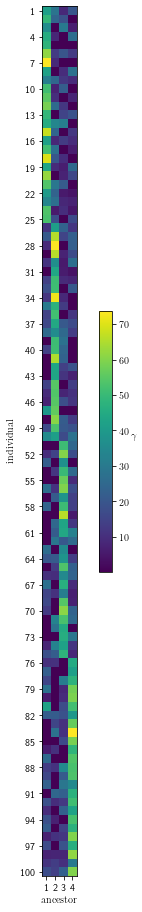

In [7]:
M, N, K = len(data[:,0]), len(data[0]), len(beta_matrix[0])
theta_mat = np.zeros(M*K).reshape(M, K)
num_iter_list = []

for i in range(M):
    _, gamma_vec, num_iter = VI_LDA(i+1, D_mat=data, B_mat=beta_matrix, alpha=0.1, epsilon=1e-3)
    theta_mat[i] = gamma_vec.reshape(1, K)
    num_iter_list.append(num_iter)

print(f'the maximum number of iterations needed to get to convergence for all {M} individuals is {max(num_iter_list)}')

# plot
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})

im = ax.imshow(theta_mat)
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.3, pad=0.1)
cbar.ax.set_ylabel('$\\gamma$', rotation=360, va='bottom')
ax.set_xticks(np.arange(len(theta_mat[0])), labels=np.arange(1, len(theta_mat[0])+1).tolist())
ax.set_yticks(np.arange(len(theta_mat[:,0]), step=3), labels=np.arange(1, len(theta_mat[:,0])+1, step=3).tolist())


fig.set_size_inches(4,16)
plt.xlabel('$\\rm ancestor$')
plt.ylabel('$\\rm individual$')
plt.savefig('3-3-2.jpg',dpi=1000, bbox_inches='tight')
plt.show()

(4) Report the number of iterations needed to get to convergence for running inference on all $M$ individuals (you may use absolute change less than $1e\text{-}3$ as the convergence criteria).

***Proof.*** We run inference on each individual separately for coding convenience and take the maximum number of iterations as the number of iterations needed to get to convergence. Python implementation of computing the number of iterations needed is as above (see $3\text{-}(3)$). The maximum number of iterations needed is $351$. We count the iterations needed for convergence for each individual and present the result in a histogram as follows.

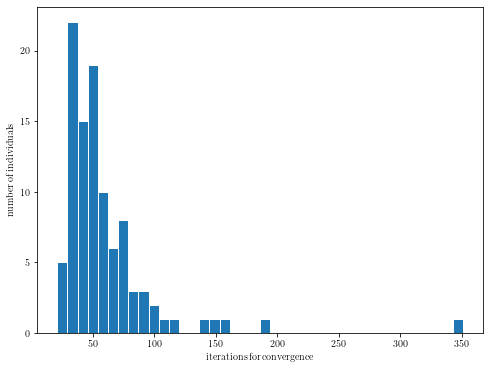

In [8]:
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.hist(np.array(num_iter_list), density=False, bins=40, edgecolor='white')

# plot settings
fig.set_size_inches(8,6)
plt.xlabel('$\\rm iterations\,for\,convergence$')
plt.ylabel('$\\rm number\, of\, individuals$')
plt.savefig('3-3-3.jpg',dpi=1000, bbox_inches='tight')
plt.show()

(5) Repeat the experiment for $\alpha = 0.01$, $\alpha = 1$, $\alpha = 10$, and for each of $\alpha$, visualize the $\Theta$ matrix summarizing the ancestor population assignments for all individuals. Discuss the changes in the ancestor population assignments to the individuals as $\alpha$ changes. Does the mean number of iterations required for convergence for inference change as $\alpha$ changes?

***Proof.*** Python implementation of the experiment is as follows. We visualize the $\Theta$ matrix summarizing the ancestor population assignments for all individuals for  $\alpha = 0.01$, $\alpha = 0.1$, $\alpha=1$ and $\alpha = 10$, respectively (from left to right). As $\alpha$ increase, the ancestor population assignments to the individuals tend to be average *i.e.* differences between $\gamma_{i,k}$ for $k=1,\ldots,4,\,\forall i$ decrease. Intuitively, when $\alpha$ increases, the inference result indicates that the ancestor populations *mix better*.

the mean number of iterations needed to get to convergence for all 100 individuals is 60.44 (alpha=0.01)
the mean number of iterations needed to get to convergence for all 100 individuals is 59.35 (alpha=0.1)
the mean number of iterations needed to get to convergence for all 100 individuals is 34.34 (alpha=1)
the mean number of iterations needed to get to convergence for all 100 individuals is 15.16 (alpha=10)


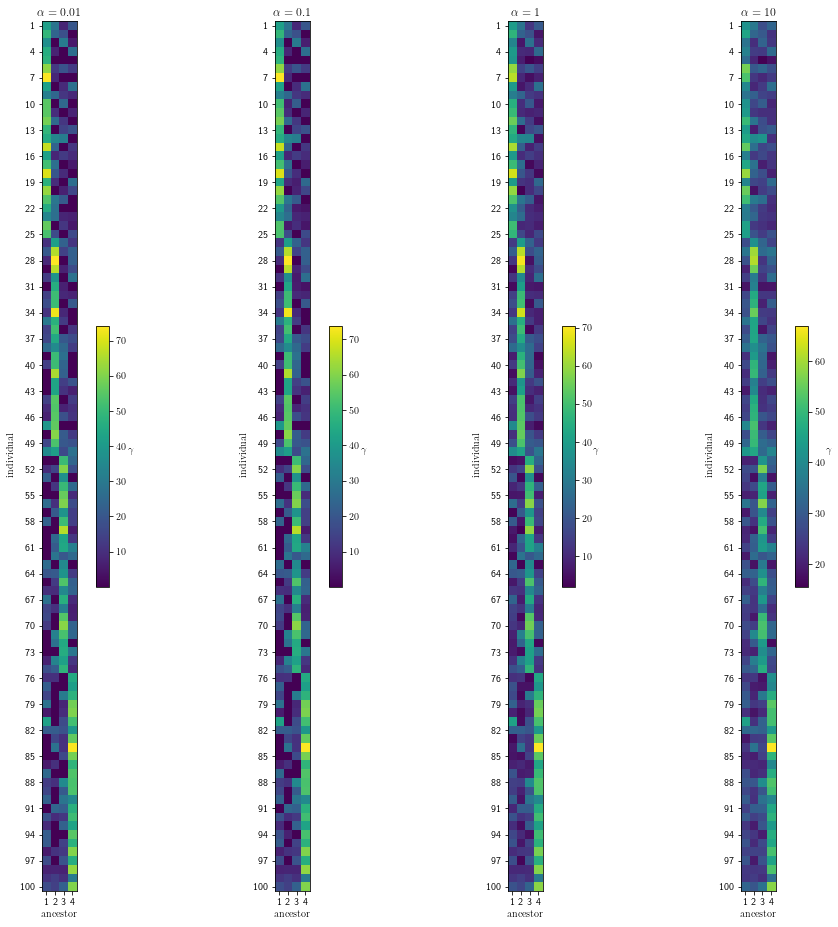

In [9]:
M, N, K = len(data[:,0]), len(data[0]), len(beta_matrix[0])

# plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
plt.rcParams.update({
    "text.usetex": True
})

for s, alpha in enumerate([0.01, 0.1, 1, 10]):
    theta_mat = np.zeros(M*K).reshape(M, K)
    num_iter_list = []

    for i in range(M):
        _, gamma_vec, num_iter = VI_LDA(i+1, D_mat=data, B_mat=beta_matrix, alpha=alpha, epsilon=1e-3)
        theta_mat[i] = gamma_vec.reshape(1, K)
        num_iter_list.append(num_iter)

    print(f'the mean number of iterations needed to get to convergence for all {M} individuals is {np.mean(num_iter_list)} (alpha={alpha})')

    ax = eval('ax'+f'{s+1}')
    im = ax.imshow(theta_mat)
    cbar = ax.figure.colorbar(im, ax=ax, shrink=0.3, pad=0.1)
    cbar.ax.set_ylabel('$\\gamma$', rotation=360, va='bottom')
    ax.set_xticks(np.arange(len(theta_mat[0])), labels=np.arange(1, len(theta_mat[0])+1).tolist())
    ax.set_yticks(np.arange(len(theta_mat[:,0]), step=3), labels=np.arange(1, len(theta_mat[:,0])+1, step=3).tolist())

    ax.set_xlabel('$\\rm ancestor$')
    ax.set_ylabel('$\\rm individual$')
    ax.set_title(f'$\\alpha={alpha}$')


fig.set_size_inches(16,16)
plt.savefig('3-3-4.jpg',dpi=1000, bbox_inches='tight')
plt.show()

The mean number of iterations required for convergence decrease as $\alpha$ increases. The detailed result is presented below.

<img src="mean_iter.png" style="zoom: 80%;" />